In [1]:
import torch
torch.set_default_dtype(torch.float64)

from reggae.utilities import save, load, LFMDataset
from reggae.gp.variational.models import MLPLFM, ExponentialLFM
from reggae.utilities import inv_softplus
from reggae.data_loaders.datasets import DeterministicLotkaVolteraData
from torch.utils.data import Dataset, DataLoader
from reggae.data_loaders import load_humanp53
from reggae.plot.variational_plotters import Plotter
from matplotlib import pyplot as plt

import numpy as np

f64 = np.float64

Lotka-Voltera is in {self.mode} mode.
Creating dataset...
2


100%|██████████| 50/50 [00:00<00:00, 450.73it/s]


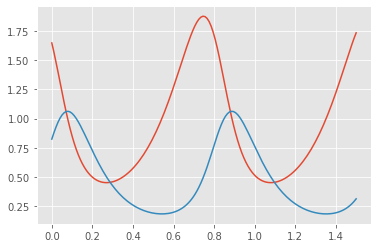

In [9]:
dataset = DeterministicLotkaVolteraData(alpha = 2./3,
							beta = 4./3, gamma = 1., delta = 1.,
							num_samples=50)
x_min, x_max = 0.0, 1.5
initial_x = -0.1

print(len(dataset.data[0]))
plt.plot(dataset.data[0][0], dataset.data[0][1])

num_latents = 2
num_outputs = 2

t_predict = torch.linspace(x_min, x_max, 50)
t_inducing = torch.linspace(f64(x_min), f64(x_max), 5, dtype=torch.float32).reshape((-1, 1))
t_observed = dataset.data[0][0].view(-1)
output_names = np.array(['pred','prey'])



In [ ]:
model = MLPLFM(num_outputs, num_latents, t_inducing, dataset)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)

trainer = Trainer(model, optimizer, dataset)

### Outputs prior to training:

In [ ]:
rtol = 5e-3
atol = rtol/10
model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}
plotter = Plotter(model, output_names, t_inducing)
plotter.plot_outputs(t_predict, model_kwargs=model_kwargs)
plotter.plot_tfs()


In [ ]:
tol = 1e-3
# trainer = Trainer(optimizer)
output = trainer.train(10, rtol=tol, atol=tol/10, report_interval=1, plot_interval=2)

### Outputs after training

In [ ]:
tol = 1e-3
plotter = Plotter(model, output_names, t_inducing)
plotter.plot_outputs(t_predict, model_kwargs=model_kwargs)
plotter.plot_tfs()

In [ ]:
save(model, 'nonlinear')

In [ ]:
model = load('nonlinear', NonLinearLFM, num_genes, num_tfs, t_inducing, t_observed, fixed_variance=None)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))

In [ ]:
titles = ['basal', 'decay', 'sensitivity', 'lengthscale']
datas = [np.array(trainer.basalrates)[:,:,0],
         np.array(trainer.decayrates)[:,:,0],
         np.array(trainer.sensitivities)[:,:,0],
         np.array(trainer.lengthscales)]

plt.figure(figsize=(5, 6))
for i, (title, data) in enumerate(zip(titles, datas)):
    plt.subplot(411 + i)
    plt.title(title)
    # if data.ndim > 1:
    #     for j in range(data.shape[1]):

    plt.plot(data)